In [1]:
import awkward as ak
import uproot
from glob import glob
import numpy as np

import hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.colors as mcolors

import os

In [3]:
beam15list = []
beam20list = []
beamlist = ["15","20"]
masslist = ["0.3","0.5","0.7","0.9"]
for beam in beamlist:
    for mass in masslist:
        sim = "data/iron/" + beam + "beam" + mass + "mass_hepmc.root"
        truth = uproot.open(sim)["Events"]
        todo = ["track_px_st1"]
        for strr in todo:
            num = len(truth[strr].array())
            list = []
            for i in range(num):
                list.append(len(truth[strr].array()[i]))
            if beam == "15":
                beam15list.append(list)
            else:
                beam20list.append(list)

In [58]:
#plot truth track
def tracklist(truth, beamlist, mnum):
    gpx0hit=[]
    gpx1hit=[]
    gpx2hit=[]
    gpx3hit=[]
    for i in range(len(beamlist[mnum])):
        if beamlist[mnum][i] == 0:
            gpx0hit.append(i)
        elif beamlist[mnum][i] == 1:
            gpx1hit.append(i)
        elif beamlist[mnum][i] == 2:
            gpx2hit.append(i)
        else:
            gpx3hit.append(i)

    x0hitlist = []
    y0hitlist = []
    z0hitlist = []
    for i in range(int(len(gpx0hit)/10)):
            x0hitlist.append(truth["hit_truthx"].array()[gpx0hit[i]])
            y0hitlist.append(truth["hit_truthy"].array()[gpx0hit[i]])
            z0hitlist.append(truth["hit_truthz"].array()[gpx0hit[i]])
    plt.figure(figsize=(20,8))        
    plt.title('x&z 0 muon');
    plt.xlabel('z/cm');
    plt.ylabel('x/cm');
    for i in range(len(x0hitlist)):
        x=z0hitlist[i]
        y=x0hitlist[i]

        j = gpx0hit[i]
        ID=truth["hit_detID"].array()[j]
        xx=[]
        yy=[]
        for i in range(len(x)):
            if ID[i] != 100:
                xx.append(x[i])
                yy.append(y[i])

        plt.scatter(xx,yy);
    plt.show()

    
    
    x1hitlist = []
    y1hitlist = []
    z1hitlist = []
    for i in range(int(len(gpx1hit)/10)):
            x1hitlist.append(truth["hit_truthx"].array()[gpx1hit[i]])
            y1hitlist.append(truth["hit_truthy"].array()[gpx1hit[i]])
            z1hitlist.append(truth["hit_truthz"].array()[gpx1hit[i]])
    plt.figure(figsize=(20,8))        
    plt.title('x&z 1 muon');
    plt.xlabel('z/cm');
    plt.ylabel('x/cm');
    for i in range(len(x1hitlist)):
        x=z1hitlist[i]
        y=x1hitlist[i]

        j = gpx1hit[i]
        ID=truth["hit_detID"].array()[j]
        xx=[]
        yy=[]
        for i in range(len(x)):
            if ID[i] != 100:
                xx.append(x[i])
                yy.append(y[i])

        plt.scatter(xx,yy);
    plt.show()

    x2hitlist = []
    y2hitlist = []
    z2hitlist = []
    for i in range(int(len(gpx2hit)/10)):
            x2hitlist.append(truth["hit_truthx"].array()[gpx2hit[i]])
            y2hitlist.append(truth["hit_truthy"].array()[gpx2hit[i]])
            z2hitlist.append(truth["hit_truthz"].array()[gpx2hit[i]])
    plt.figure(figsize=(20,8))        
    plt.title('x&z 2 muon');
    plt.xlabel('z/cm');
    plt.ylabel('x/cm');
    for i in range(len(x2hitlist)):
        x=z2hitlist[i]
        y=x2hitlist[i]

        j = gpx2hit[i]
        ID=truth["hit_detID"].array()[j]
        xx=[]
        yy=[]
        for i in range(len(x)):
            if x[i] < 10**5 and y[i]< 10**5:
                    xx.append(x[i])
                    yy.append(y[i])

        plt.scatter(xx,yy);
    plt.show()

    x3hitlist = []
    y3hitlist = []
    z3hitlist = []
    for i in range(int(len(gpx3hit)/10)):
            x3hitlist.append(truth["hit_truthx"].array()[gpx3hit[i]])
            y3hitlist.append(truth["hit_truthy"].array()[gpx3hit[i]])
            z3hitlist.append(truth["hit_truthz"].array()[gpx3hit[i]])
    plt.figure(figsize=(20,8))        
    plt.title('x&z 3 muon');
    plt.xlabel('z/cm');
    plt.ylabel('x/cm');
    for i in range(len(x3hitlist)):
        x=z3hitlist[i]
        y=x3hitlist[i]

        j = gpx3hit[i]
        ID=truth["hit_detID"].array()[j]
        xx=[]
        yy=[]
        for i in range(len(x)):
            if x[i] < 10**5 and y[i]< 10**5:
                xx.append(x[i])
                yy.append(y[i])

        plt.scatter(xx,yy);
    plt.show()
            
    return gpx0hit,gpx1hit,gpx2hit,gpx3hit,x0hitlist,y0hitlist,z0hitlist, x1hitlist,y1hitlist,z1hitlist, x2hitlist,y2hitlist,z2hitlist, x3hitlist,y3hitlist,z3hitlist
 

data/iron/15beam0.3mass_hepmc.root


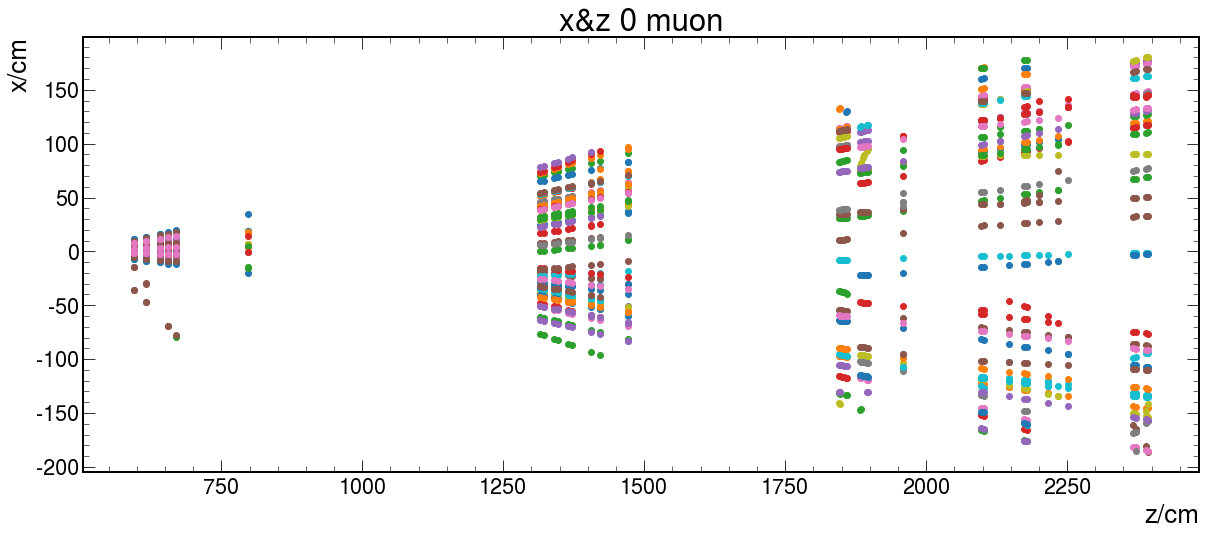

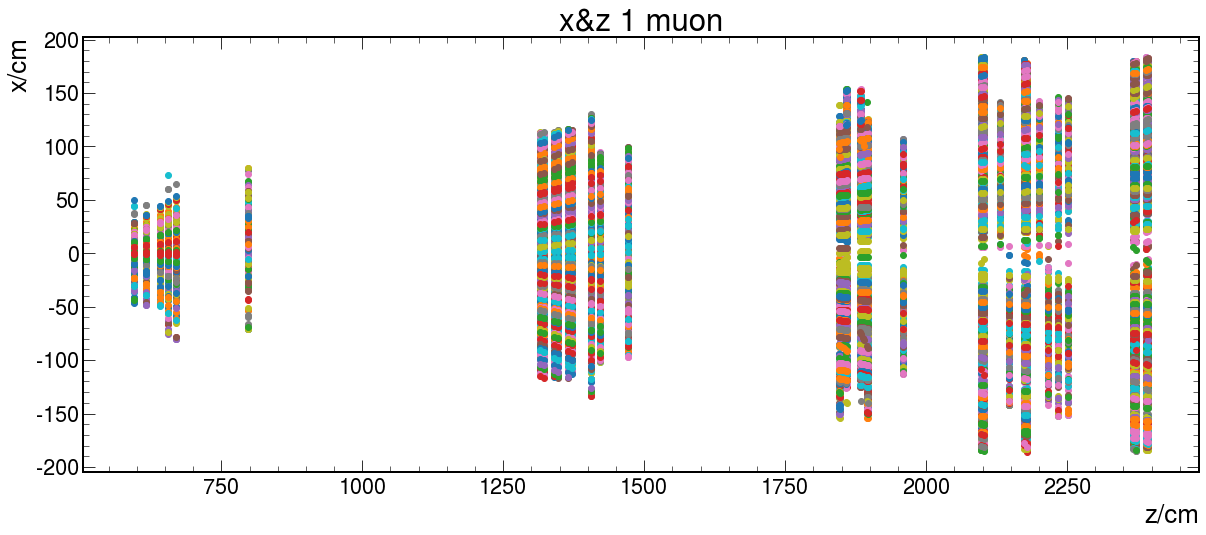

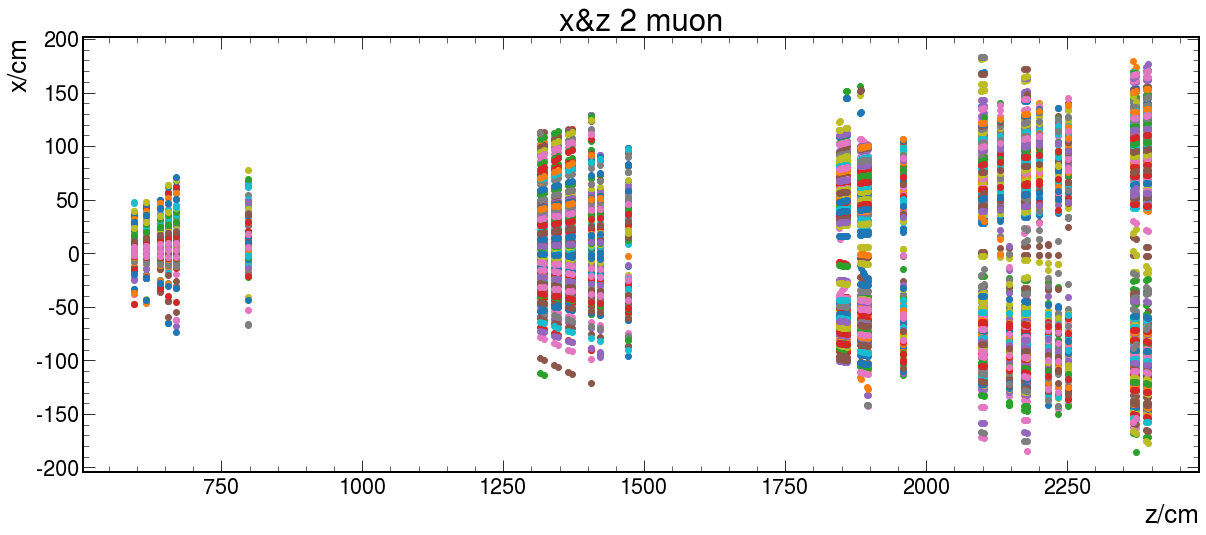

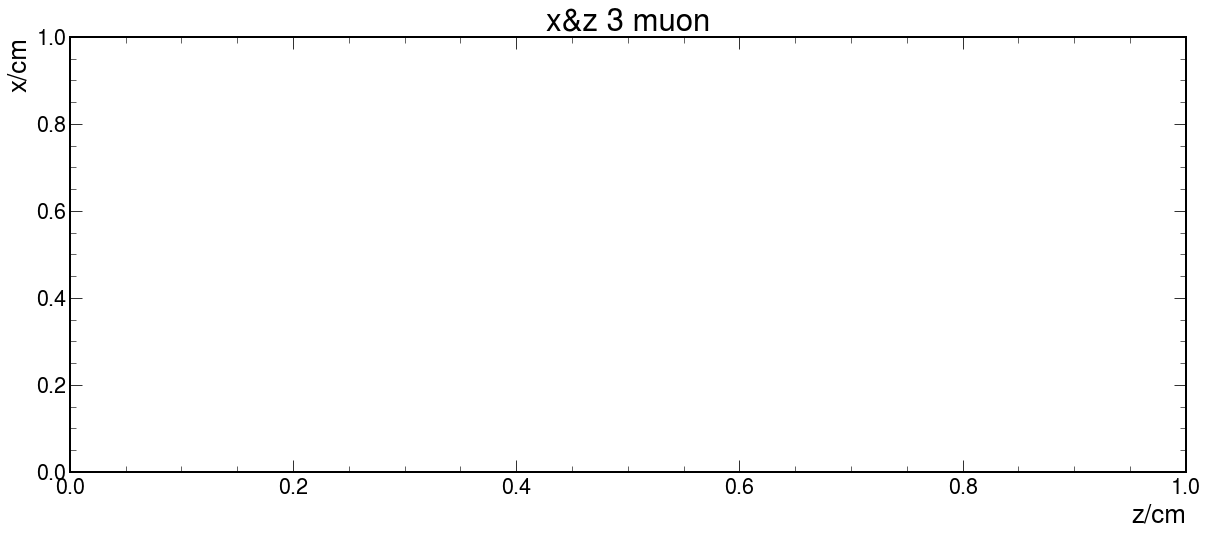

data/iron/15beam0.5mass_hepmc.root


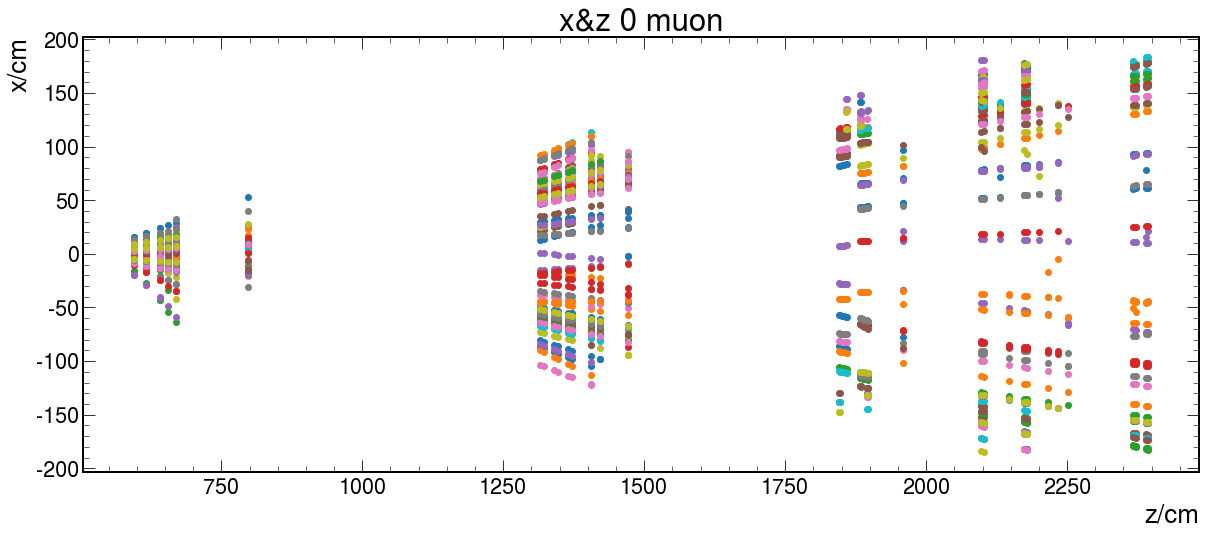

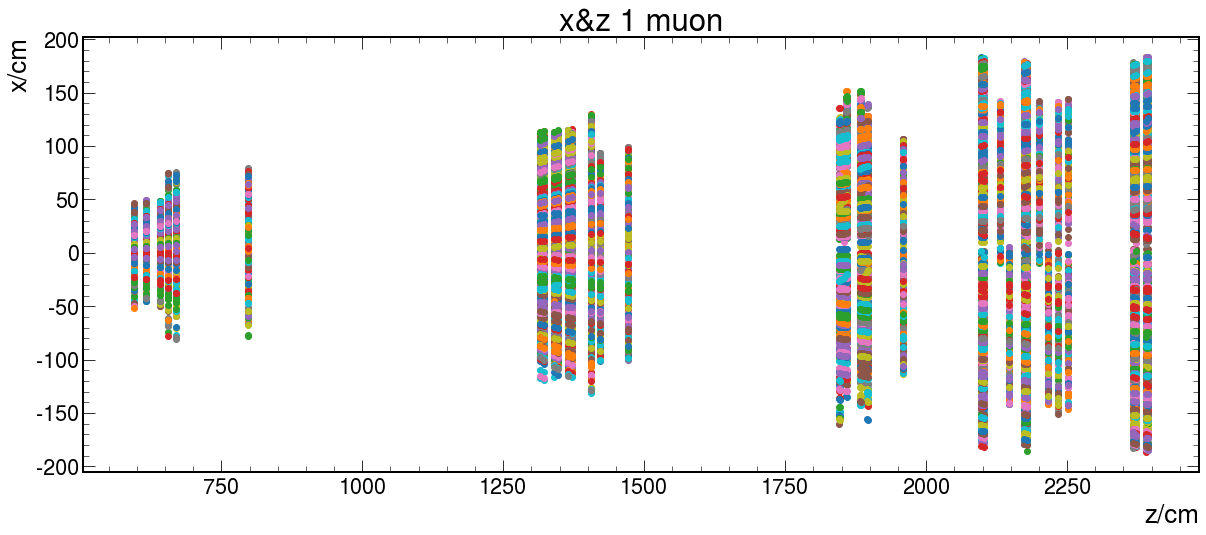

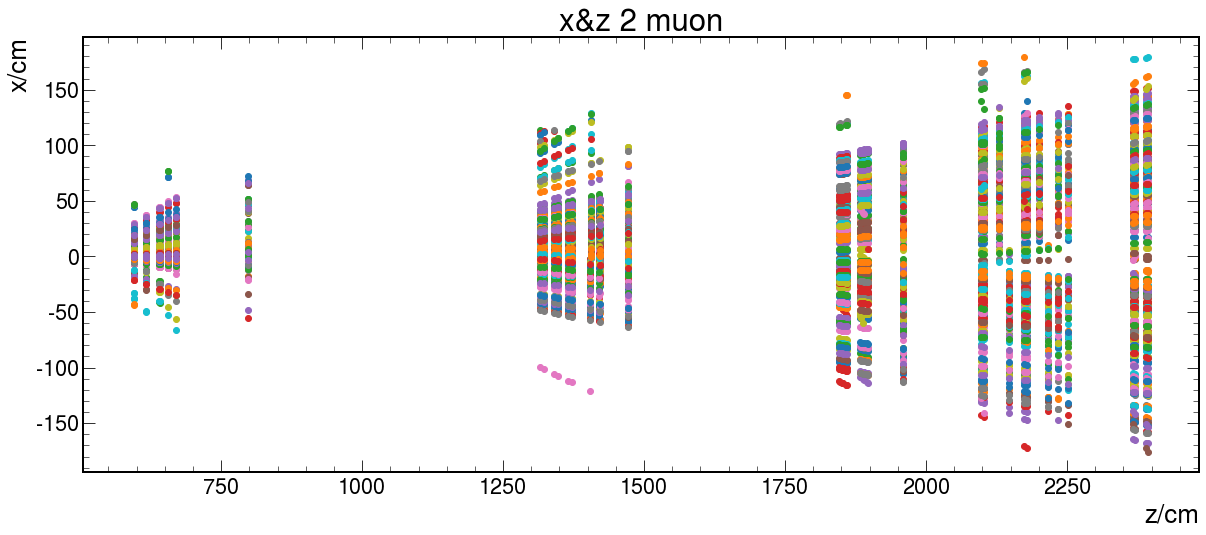

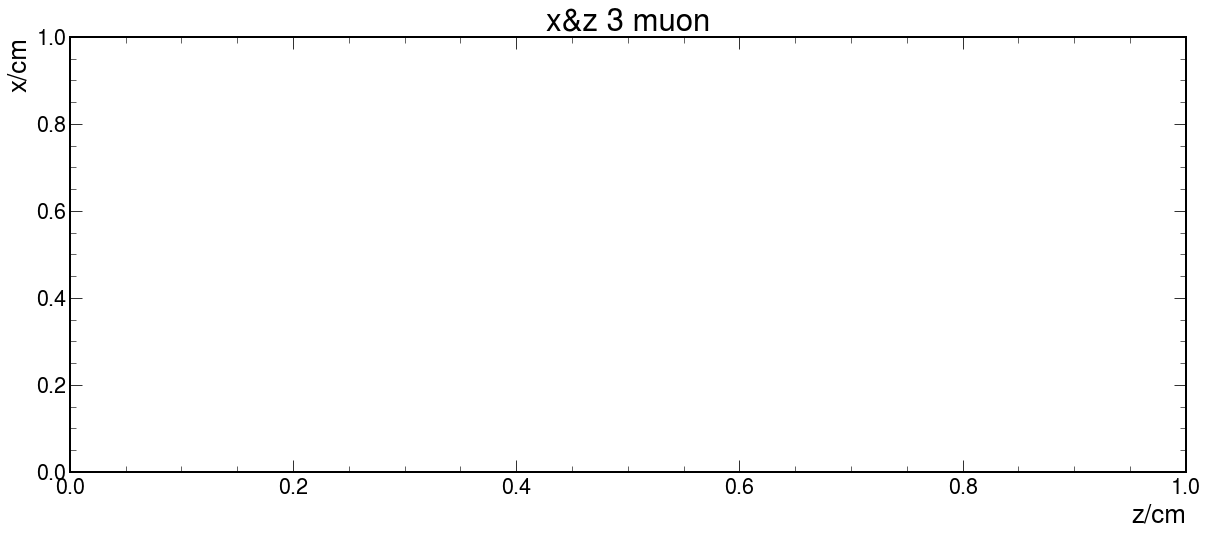

data/iron/15beam0.7mass_hepmc.root


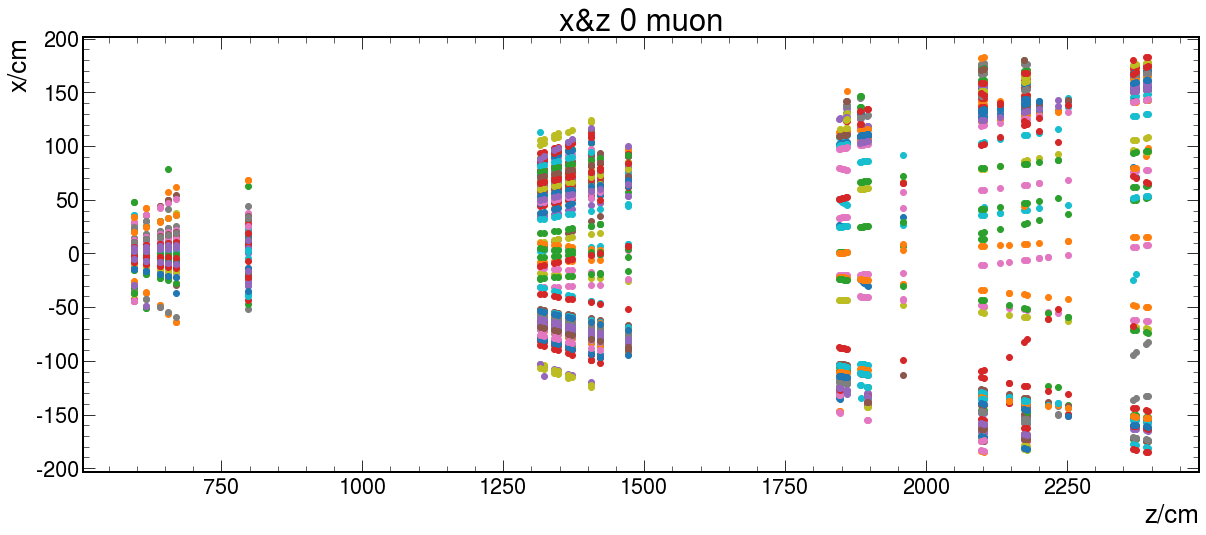

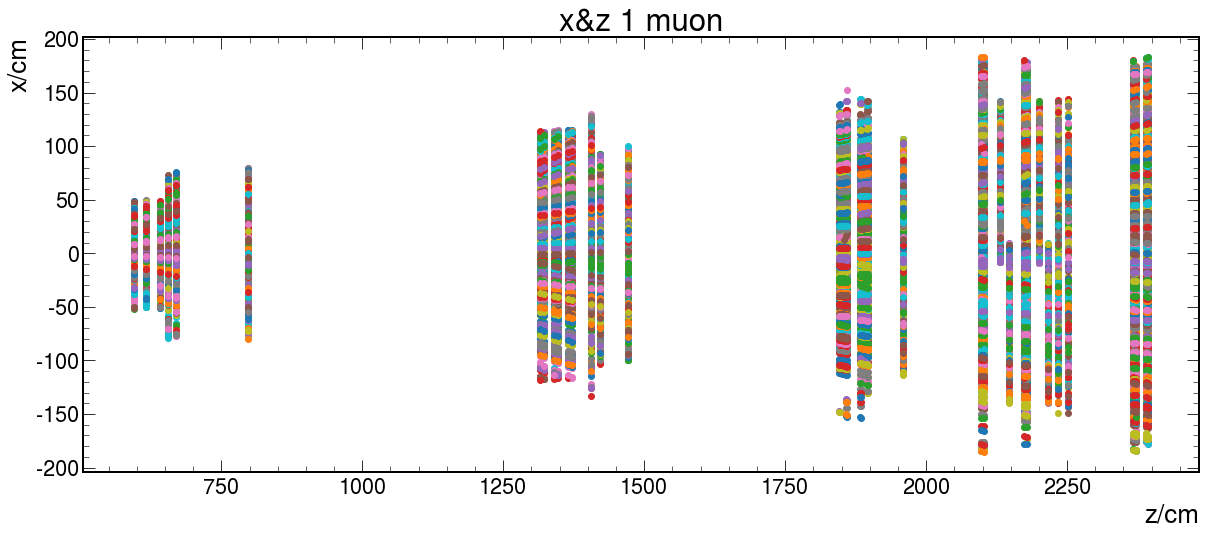

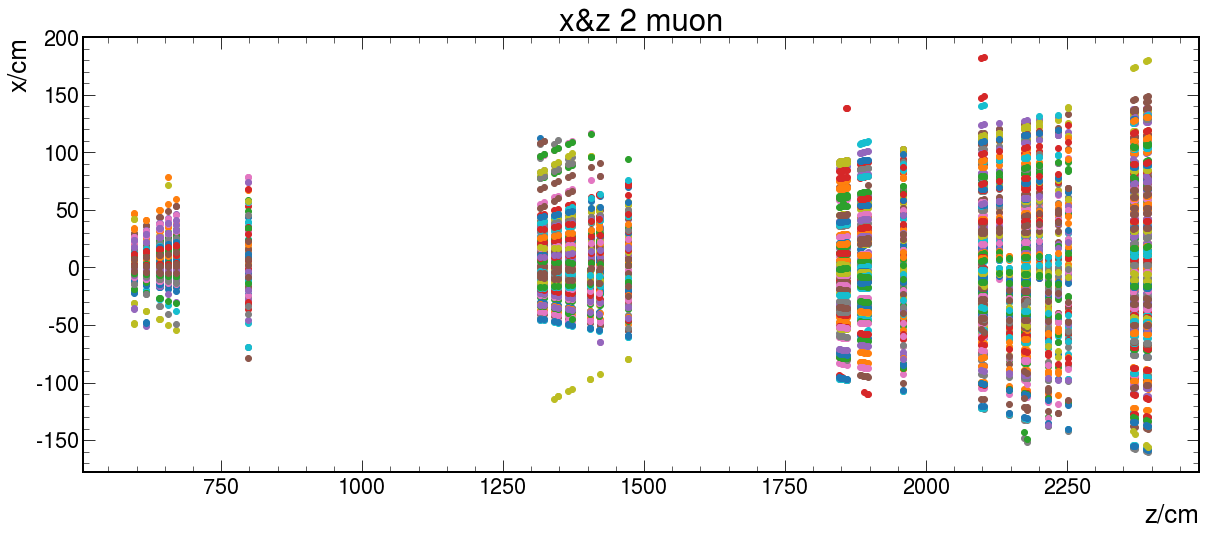

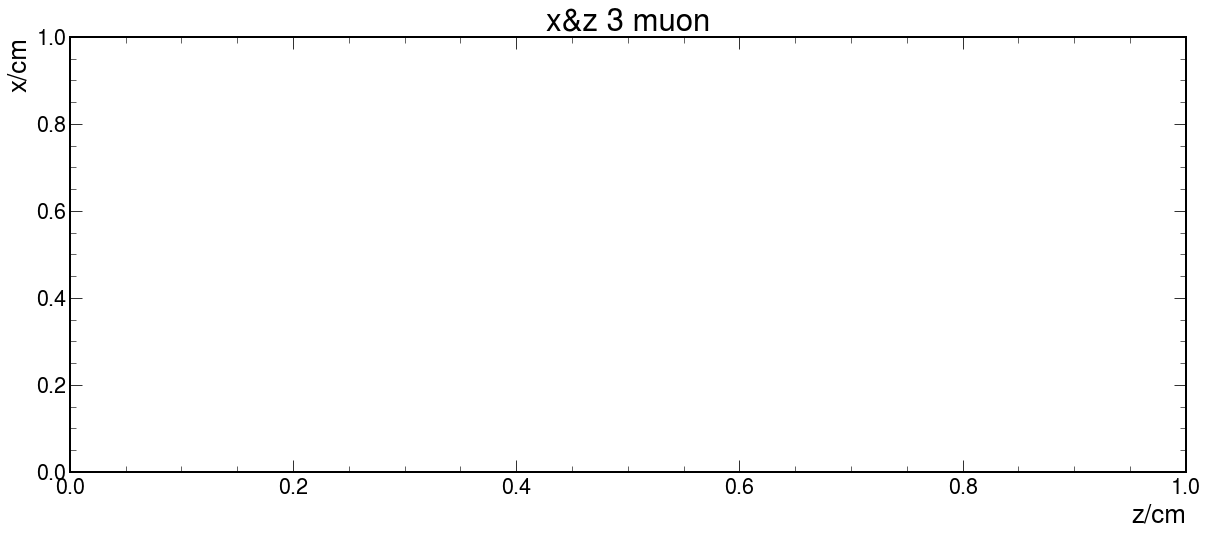

data/iron/15beam0.9mass_hepmc.root


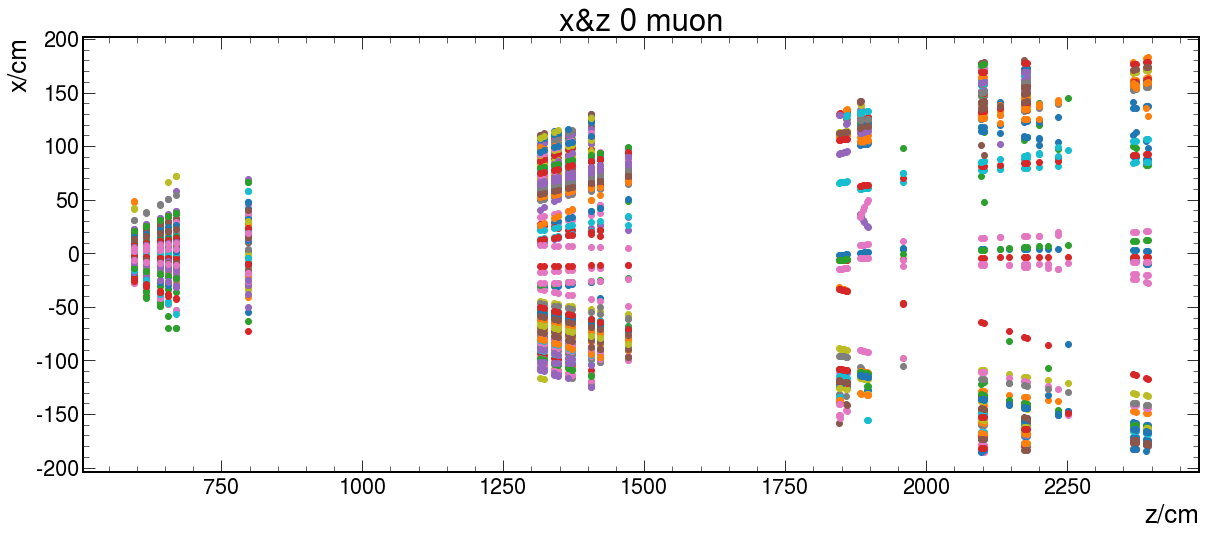

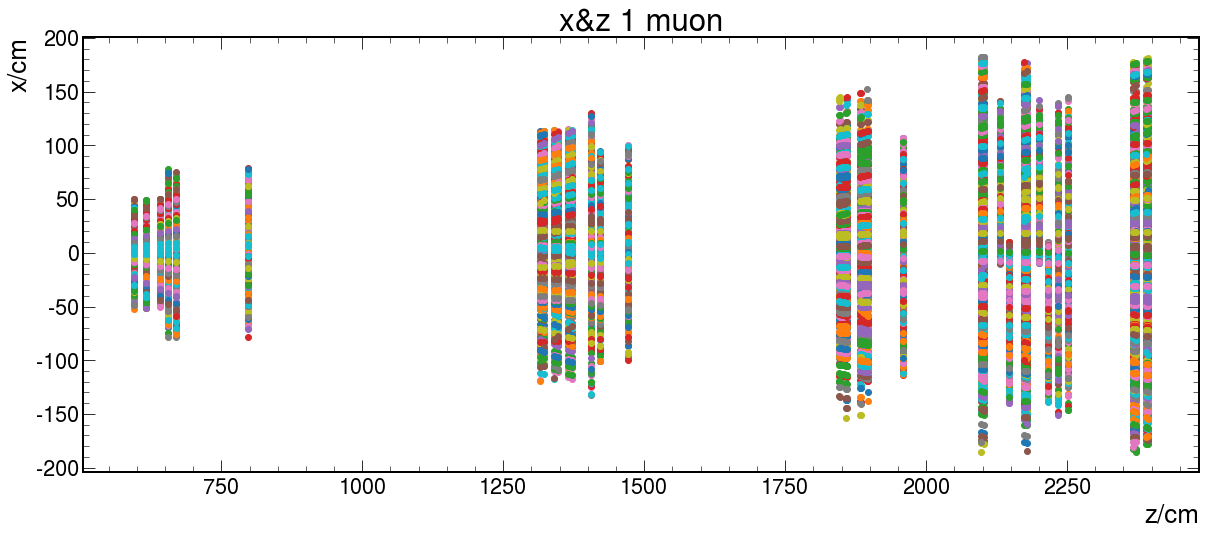

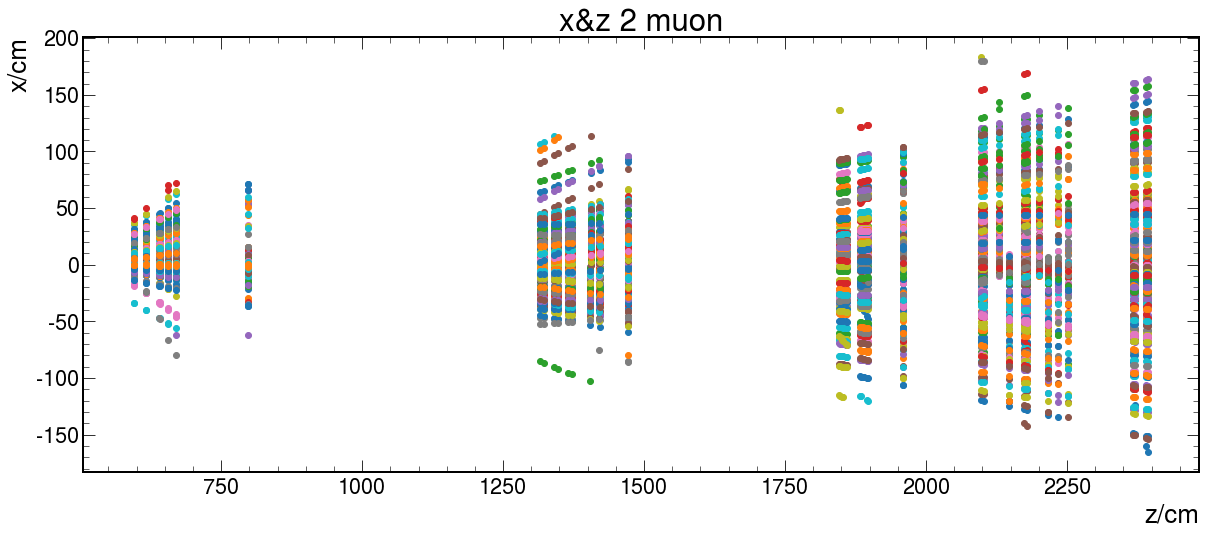

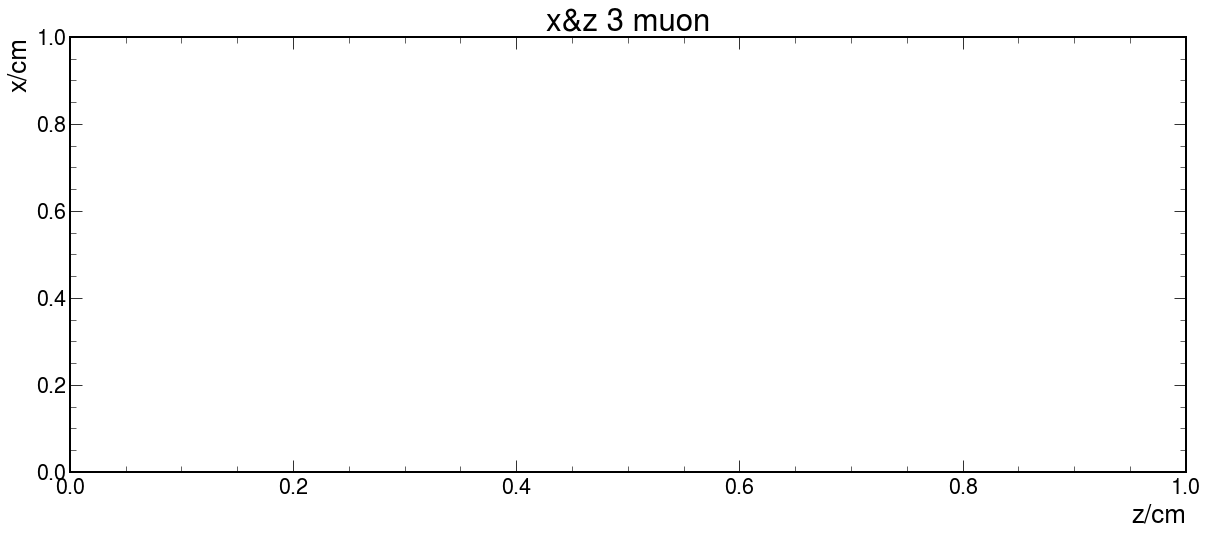

data/iron/20beam0.3mass_hepmc.root


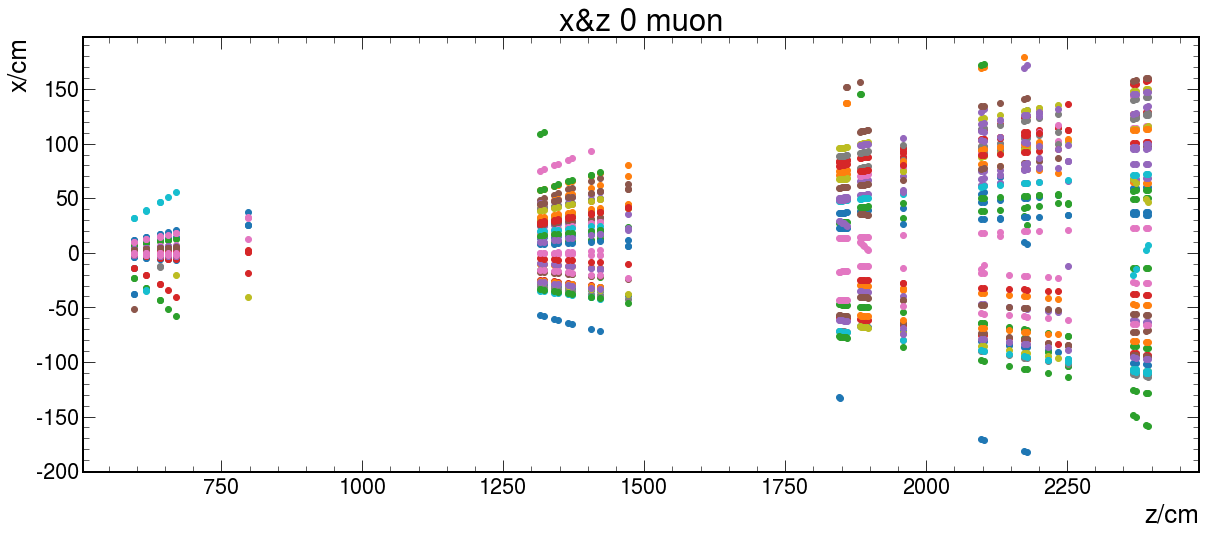

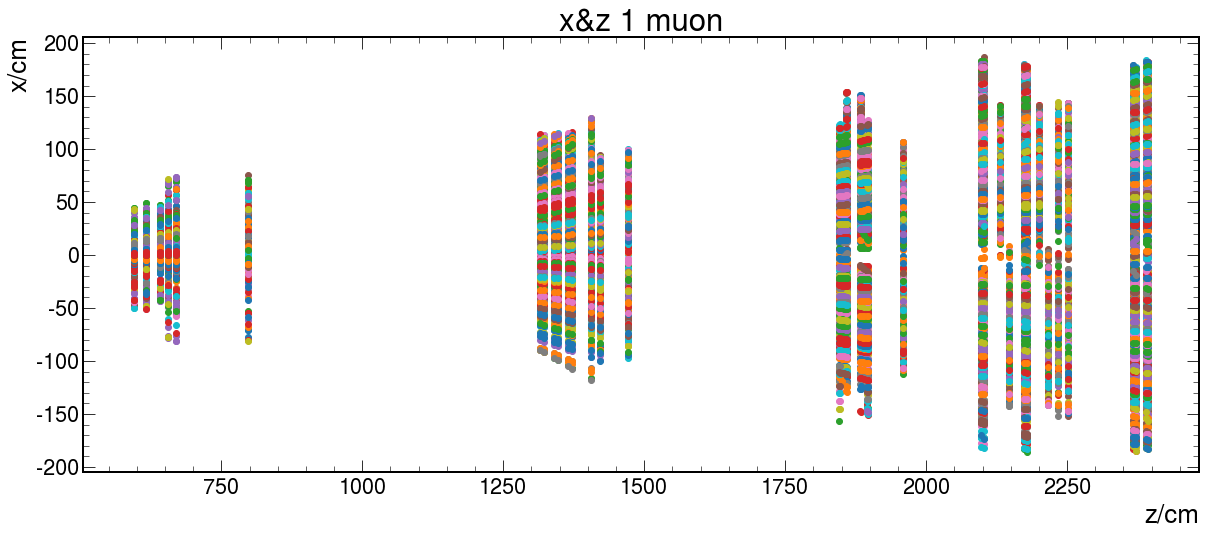

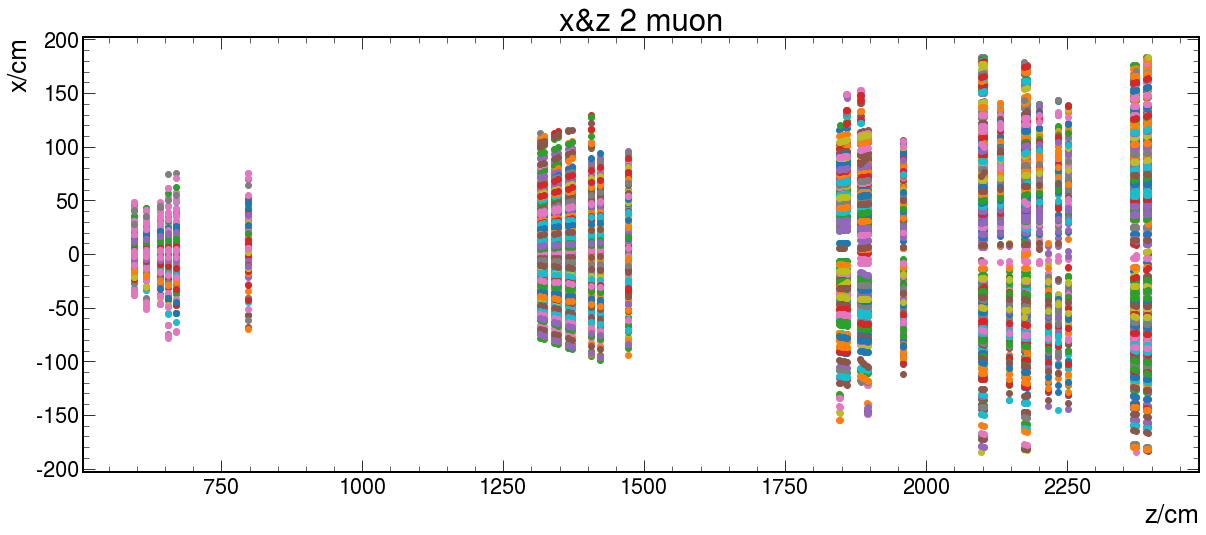

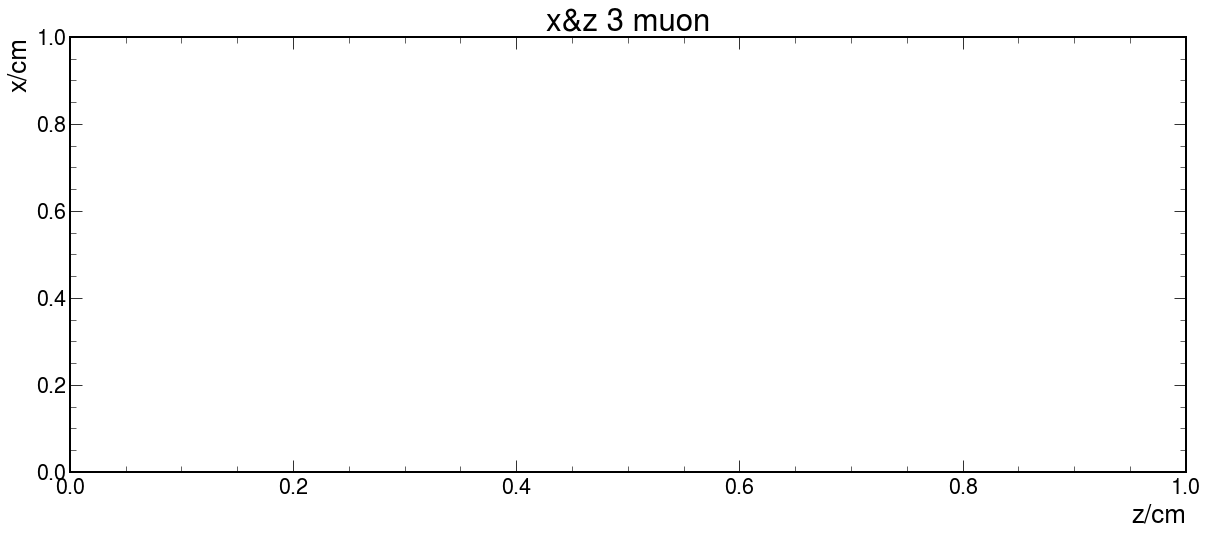

data/iron/20beam0.5mass_hepmc.root


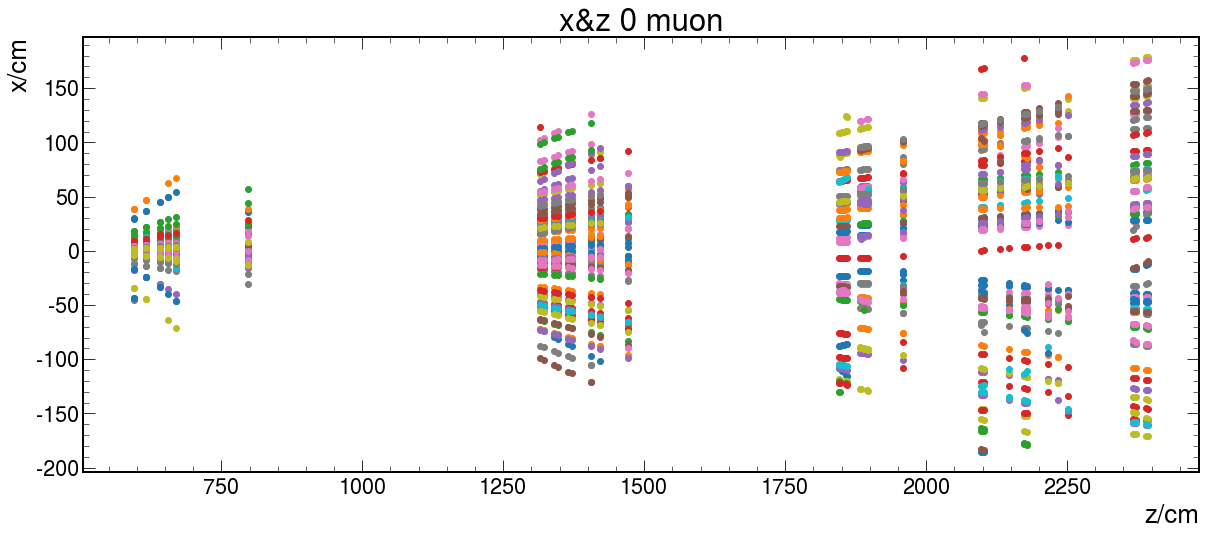

In [ ]:
beamlist = ["15","20"]
masslist = ["0.3","0.5","0.7","0.9"]
for beam in beamlist:
    for mnum in [0,1,2,3]:
        sim = "data/iron/" + beam + "beam" + masslist[mnum] + "mass_hepmc.root"
        truth = uproot.open(sim)["Events"]
        print(sim)
        if beam == "15":
            gpx0hit,gpx1hit,gpx2hit,gpx3hit, x0hitlist,y0hitlist,z0hitlist, x1hitlist,y1hitlist,z1hitlist, x2hitlist,y2hitlist,z2hitlist, x3hitlist,y3hitlist,z3hitlist = tracklist(truth=truth, beamlist = beam15list, mnum=mnum)
        if beam == "20":
            gpx0hit,gpx1hit,gpx2hit,gpx3hit, x0hitlist,y0hitlist,z0hitlist, x1hitlist,y1hitlist,z1hitlist, x2hitlist,y2hitlist,z2hitlist, x3hitlist,y3hitlist,z3hitlist = tracklist(truth=truth, beamlist = beam15list, mnum=mnum)

In [21]:
len(gpx0hit)

671

67

ValueError: in NumpyArray attempting to get 90, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/libawkward/array/NumpyArray.cpp#L1215)

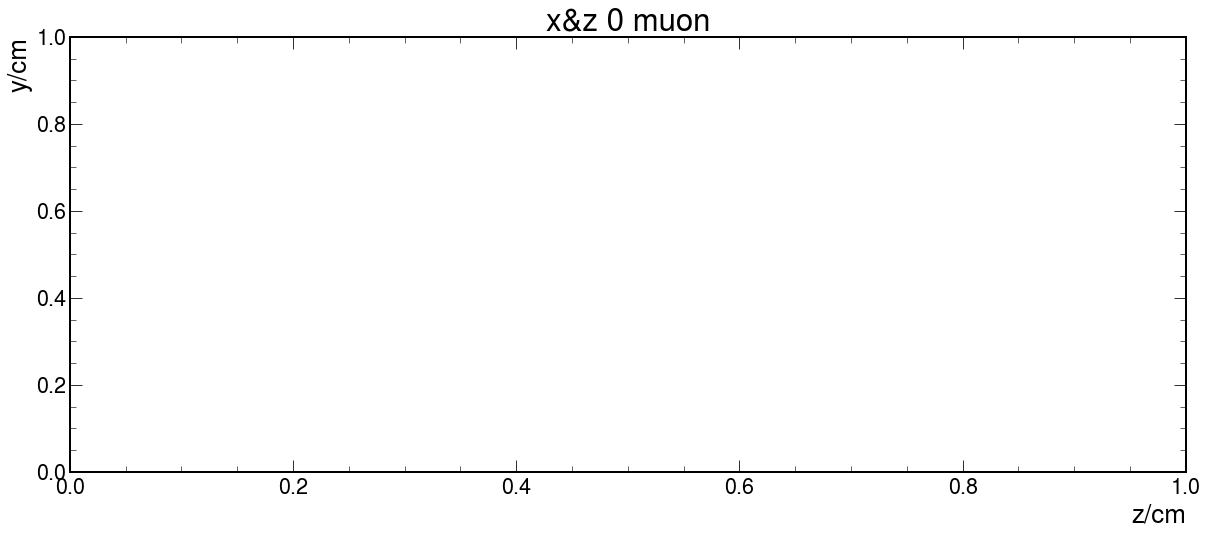

In [31]:
plt.figure(figsize=(20,8))        
plt.title('x&z 0 muon');
plt.xlabel('z/cm');
plt.ylabel('y/cm');
for i in range(len(x0hitlist)):
    x=z2hitlist[i]
    y=x2hitlist[i]

    j = gpx2hit[i]
    ID=truth["hit_detID"].array()[j]
    xx=[]
    yy=[]
    for i in range(len(x)):
        if ID[i] != 100:
            xx.append(x[i])
            yy.append(y[i])

    plt.scatter(xx,yy);
plt.show()